In [1]:
# xmlrpc_client.ipynb

from xmlrpc import client as xc
import pickle
import pandas as pd
import datetime

server = xc.ServerProxy("http://localhost:8001")
stats_server = xc.ServerProxy("http://localhost:8018")

print(server.system.listMethods())

print('Ping:', server.ping())
print('Server datetime:', server.now())

print('View, type, value:', server.type(2))
print('View, type, value:', server.type(2.))
print('View, type, value:', server.type('My string'))
print('View, type, value:', server.type("My string"))
print('View, type, value:', server.type([1,2,3]))
print('View, type, value:', server.type(["one", "two", "three"]))
print('View, type, value:', server.type((1,2,"3")))

print('Sum 2 + 3 :', server.sum(2, 3))
print('Pow 2^3: ', server.pow(2, 3))

['binarization', 'black_list_check', 'black_list_check_fio', 'color_inversion', 'now', 'ping', 'pow', 'reflection_horizontal', 'reflection_vertical', 'send_back_binary', 'sum', 'system.listMethods', 'system.methodHelp', 'system.methodSignature', 'type']
Ping: True
Server datetime: 20231107T03:23:56
View, type, value: ['2', "<class 'int'>", 2]
View, type, value: ['2.0', "<class 'float'>", 2.0]
View, type, value: ['My string', "<class 'str'>", 'My string']
View, type, value: ['My string', "<class 'str'>", 'My string']
View, type, value: ['[1, 2, 3]', "<class 'list'>", [1, 2, 3]]
View, type, value: ["['one', 'two', 'three']", "<class 'list'>", ['one', 'two', 'three']]
View, type, value: ["[1, 2, '3']", "<class 'list'>", [1, 2, '3']]
Sum 2 + 3 : 5
Pow 2^3:  8


In [2]:
info = stats_server.get_info('type', '2021-07-11 00:00:00', '2024-07-11 12:00:00', '00:00:00', '12:00:00')
for el in info:
    print(el)

[3, 'type', '2023-11-07 03:20:37', '0:00:02.043299']
[4, 'type', '2023-11-07 03:20:43', '0:00:02.021788']
[5, 'type', '2023-11-07 03:20:49', '0:00:02.045275']
[6, 'type', '2023-11-07 03:20:55', '0:00:02.045432']
[7, 'type', '2023-11-07 03:21:01', '0:00:02.047233']
[8, 'type', '2023-11-07 03:21:07', '0:00:02.030991']
[9, 'type', '2023-11-07 03:21:13', '0:00:02.059774']
[13, 'type', '2023-11-07 03:24:00', '0:00:02.029368']
[14, 'type', '2023-11-07 03:24:06', '0:00:02.032771']
[15, 'type', '2023-11-07 03:24:12', '0:00:02.034797']
[16, 'type', '2023-11-07 03:24:19', '0:00:02.029810']
[17, 'type', '2023-11-07 03:24:25', '0:00:02.035742']
[18, 'type', '2023-11-07 03:24:31', '0:00:02.035634']
[19, 'type', '2023-11-07 03:24:37', '0:00:02.031754']


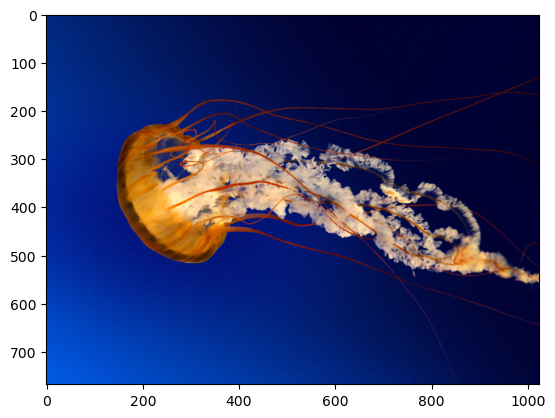

In [3]:
from PIL import Image # Работа с изображением
from pylab import * # Отображение

from xmlrpc import client as xc

# Режим отображения внутри ноутбука
%matplotlib inline

img = Image.open('Jellyfish.jpg')

img_arr = array(img)

# Исходное изображение
imshow(img_arr)

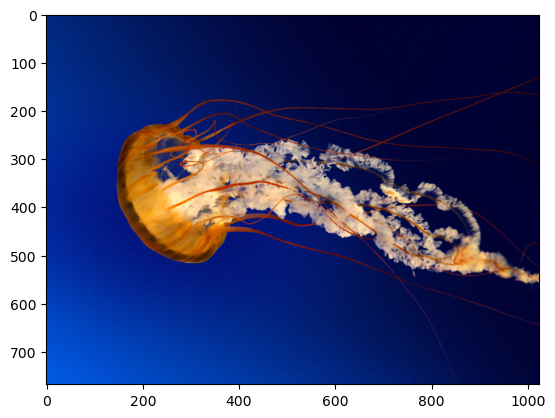

In [4]:
# Тест бинарной передачи данных
#pimg = img_arr.dumps()
pimg = pickle.dumps(img_arr) # универсально

img_bin = xc.Binary(pimg)

img_bin2 = server.send_back_binary(img_bin)

#img_arr2 = np.loads(img_bin2.data)
img_arr2 = pickle.loads(img_bin2.data) # универсально

# Изображение после возрата с сервера
imshow(img_arr2)

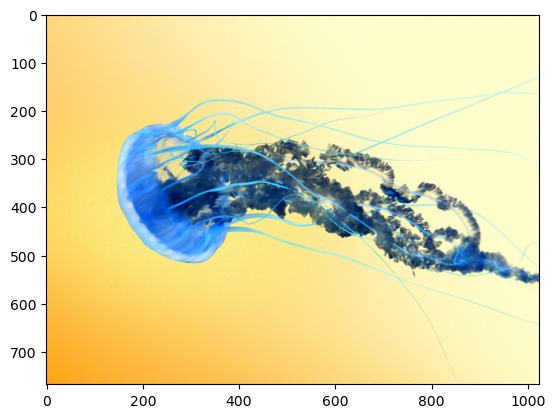

In [5]:

# Инверсия цвета изображения через сервер
def inv_color(img_arr_in):
    pimg = pickle.dumps(img_arr_in)
    img_bin = xc.Binary(pimg)
    
    img_bin2 = server.color_inversion(img_bin)
    
    img_arr_out = pickle.loads(img_bin2.data)
    return img_arr_out

img_arr_inv = inv_color(img_arr)

# Изображение с инверсией цвета
imshow(img_arr_inv)

In [ ]:
# Бинаризация
def binarization(img_arr_in, threshold):
    pimg = pickle.dumps(img_arr_in)
    img_bin = xc.Binary(pimg)
    
    img_bin2 = server.binarization(img_bin, threshold)
    
    img_arr_out = pickle.loads(img_bin2.data)
    return img_arr_out

img_arr_bin = binarization(img_arr, [128, 128, 160])

imshow(img_arr_bin)

In [ ]:
# Отражение по горизонтали
def reflection_horizontal(img_arr_in):
    pimg = pickle.dumps(img_arr_in)
    img_bin = xc.Binary(pimg)
    
    img_bin2 = server.reflection_horizontal(img_bin)
    
    img_arr_out = pickle.loads(img_bin2.data)
    return img_arr_out

img_arr_ref_hor = reflection_horizontal(img_arr)

imshow(img_arr_ref_hor)

In [ ]:
# Отражение по вертикали
def reflection_vertical(img_arr_in):
    pimg = pickle.dumps(img_arr_in)
    img_bin = xc.Binary(pimg)
    
    img_bin2 = server.reflection_vertical(img_bin)
    
    img_arr_out = pickle.loads(img_bin2.data)
    return img_arr_out

img_arr_ref_ver = reflection_vertical(img_arr)

imshow(img_arr_ref_ver)

In [ ]:
print(server.black_list_check('Петров'))
print(server.black_list_check('Примеров'))


In [ ]:
print(server.black_list_check_fio('Петров', 'Петр', 'Петрович', '07.08.1985'))
print(server.black_list_check_fio('Петров', 'Иван', 'Петрович', '07.08.1985'))
print(server.black_list_check_fio('Петров', 'Петр', 'Петрович', '07.02.1995'))

In [ ]:
img = Image.open('11.bmp')

img_arr = array(img)

# Исходное изображение
imshow(img_arr, cmap='gray')

In [ ]:
img_arr_inv = inv_color(img_arr)
# Изображение с инверсией цвета
imshow(img_arr_inv, cmap='gray')

In [ ]:
img_arr_bin = binarization(img_arr, 150)
# После бинаризации
imshow(img_arr_bin, cmap='gray')

In [ ]:
img_arr_ref_hor = reflection_horizontal(img_arr)
# Отражение по горизонтали
imshow(img_arr_ref_hor, cmap='gray')

In [ ]:
img_arr_ref_ver = reflection_vertical(img_arr)
# Отражение по вертикали
imshow(img_arr_ref_ver, cmap='gray')